In [1]:
import tensorflow as tf 
import os

In [2]:
# avoid OOM erros by setting GPU Momory Consumption Growth 
gpus=tf.config.experimental.list_physical_devices('gpu')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True) 

In [3]:
# Remove dodgy image
import cv2 
import imghdr
data_dir='Data'

  

In [4]:
os.listdir(data_dir)

['happy', 'sad']

In [5]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1-2.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_176864699_2rY3V6rmOJ2EexazQGd1NnOnCherr6Sk.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '35438_hd.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'AKPQZvw6P3qw-Oi3me6zJQUvwMBSYfajLniMFni76SHVcgs64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'dv2051009.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'GettyImages-871518740.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'getty_505175324_20001310

In [6]:
image_exts=['jpeg','jpg','bmp','png']

for image_class in os.listdir(data_dir):
    #first for loop frint the elements of Data(happy and sad)
    for image in os.listdir(os.path.join(data_dir,image_class)):
        #print happy and sad elements
        image_path=os.path.join(data_dir,image_class,image)
        #constuct the full path to the current image file
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in exit list{}'.format(image_path )) 
                os.remove(image_path) 
        except:
            print('Issue with image{}'.format(image_path))        

# Load data 

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
  

In [8]:
data=tf.keras.utils.image_dataset_from_directory('Data')

Found 164 files belonging to 2 classes.


In [9]:
data_iterator=data.as_numpy_iterator()
data_iterator

In [10]:
batch=data_iterator.next()
batch


(array([[[[  5.       ,  46.       ,  98.       ],
          [  6.       ,  47.       ,  99.       ],
          [  5.9375   ,  48.9375   , 101.9375   ],
          ...,
          [ 20.3125   ,  71.3125   , 126.3125   ],
          [ 18.1875   ,  69.1875   , 124.1875   ],
          [ 16.029785 ,  67.029785 , 122.029785 ]],
 
         [[  5.4296875,  46.429688 ,  98.42969  ],
          [  6.0805664,  47.080566 ,  99.08057  ],
          [  6.9375   ,  49.9375   , 102.9375   ],
          ...,
          [ 20.92041  ,  71.92041  , 126.92041  ],
          [ 19.536621 ,  70.53662  , 125.53662  ],
          [ 17.026855 ,  68.026855 , 123.026855 ]],
 
         [[  6.       ,  47.       ,  99.       ],
          [  6.       ,  49.       , 100.       ],
          [  6.9375   ,  49.9375   , 102.9375   ],
          ...,
          [ 22.695312 ,  73.69531  , 128.69531  ],
          [ 20.570312 ,  71.57031  , 126.57031  ],
          [ 18.445312 ,  69.44531  , 124.44531  ]],
 
         ...,
 
         [[ 

In [11]:
len(batch)

2

In [12]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [13]:
#label of images(happy or sad)
#class 1= sad people
#class 0= happy people 
batch[1]

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

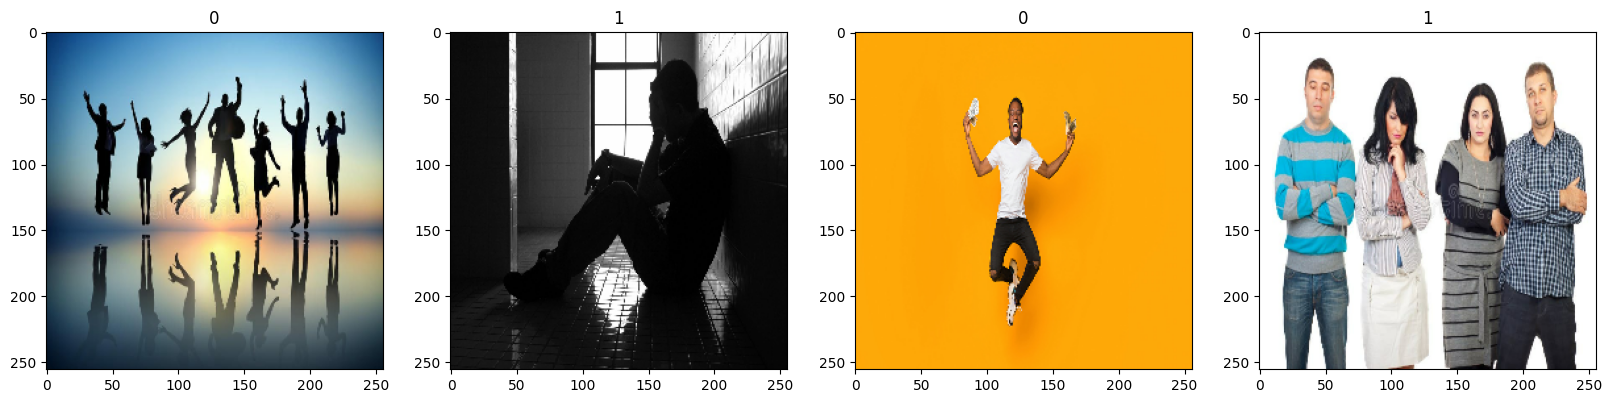

In [14]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
    
 

# preprocessing data 

In [15]:
#scale data 
data=data.map(lambda x,y:(x/255,y)) 

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [16]:
data.as_numpy_iterator().next()

(array([[[[0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9847082 , 0.9847082 , 0.9847082 ],
          [0.93720895, 0.9653876 , 0.95828736],
          ...,
          [0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ]],
 
         [[0.9882353 , 0.9882353 , 0.9882353 ],
          [0.98763406, 0.98763406, 0.98763406],
          [0.9390012 , 0.96199447, 0.95660233],
          ...,
          [0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ]],
 
         [[0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9843137 , 0.9843137 , 0.9843137 ],
          [0.98263633, 0.9836167 , 0.9831265 ],
          ...,
          [0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ]],
 
         ...,
 
         [[0.36843598, 0.5147021 , 0.49638864],
          [0.83296

In [17]:
data.as_numpy_iterator().next()[0].max()

1.0

In [18]:
#split data
len(data) 

6

In [19]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1


In [20]:
train_size+val_size+test_size

6

In [21]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

# Building the Deeplerning Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [23]:
model= Sequential()

In [24]:
model.add(Conv2D(16,(3,3),1,activation='relu', input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid')) 



In [25]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train

In [27]:
logdir='logs'
tensorboad_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist=model.fit(train, epochs=20, validation_data=val,callbacks=[tensorboad_callback])

Epoch 1/20


c:\Users\user\anaconda3\envs\Deeplearning\lib\site-packages\keras\backend.py:5677: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits, "Sigmoid", "binary_crossentropy"


4/4 [==============================] - 11s 2s/step - loss: 1.4348 - accuracy: 0.5000 - val_loss: 0.8969 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 0.7592 - accuracy: 0.5078 - val_loss: 0.6362 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 7s 2s/step - loss: 0.6882 - accuracy: 0.5469 - val_loss: 0.6706 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 7s 2s/step - loss: 0.6531 - accuracy: 0.6719 - val_loss: 0.6402 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 7s 2s/step - loss: 0.6172 - accuracy: 0.7266 - val_loss: 0.4690 - val_accuracy: 0.8125
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.5664 - accuracy: 0.7578 - val_loss: 0.4021 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 0.4945 - accuracy: 0.7891 - val_loss: 0.4528 - val_accuracy: 0.8438
Epoch 8/20
4/4 [==============================] - 7

In [29]:
hist.history

{'loss': [1.434800624847412,
  0.7591954469680786,
  0.6882239580154419,
  0.6531031131744385,
  0.6172161102294922,
  0.5663635730743408,
  0.49449580907821655,
  0.42170971632003784,
  0.3446418046951294,
  0.26858362555503845,
  0.2397288829088211,
  0.22176887094974518,
  0.18910004198551178,
  0.2165915071964264,
  0.14021988213062286,
  0.13667535781860352,
  0.08485408127307892,
  0.06538300961256027,
  0.0669235810637474,
  0.047657310962677],
 'accuracy': [0.5,
  0.5078125,
  0.546875,
  0.671875,
  0.7265625,
  0.7578125,
  0.7890625,
  0.8125,
  0.9296875,
  0.9453125,
  0.921875,
  0.9296875,
  0.9609375,
  0.953125,
  0.96875,
  0.953125,
  0.9921875,
  0.984375,
  0.984375,
  0.984375],
 'val_loss': [0.8968559503555298,
  0.636243462562561,
  0.6706100702285767,
  0.640216052532196,
  0.46898919343948364,
  0.40212294459342957,
  0.45275646448135376,
  0.3794505000114441,
  0.210454061627388,
  0.17253096401691437,
  0.22383122146129608,
  0.2173728048801422,
  0.21145039

Plot performance

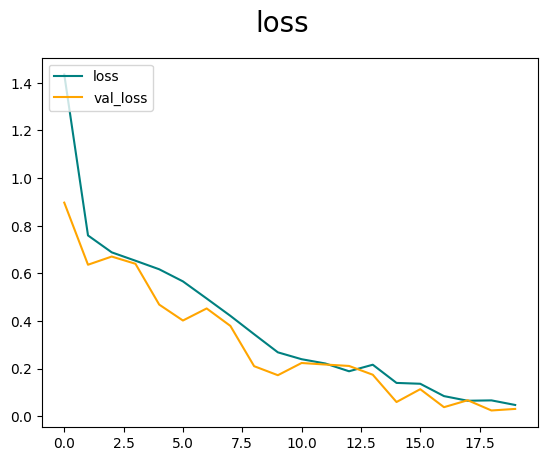

In [30]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

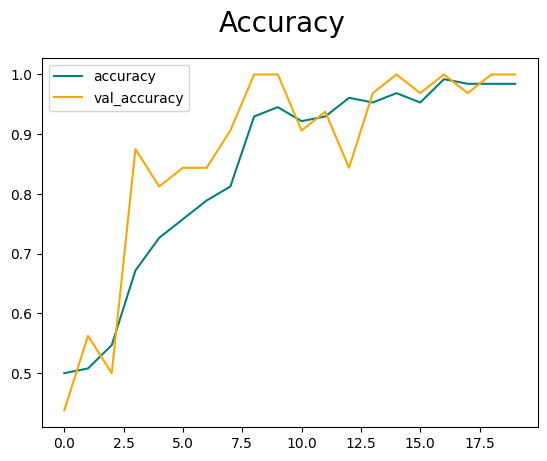

In [31]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate Performance

In [32]:
from tensorflow.keras.metrics import Precision, Recall,BinaryAccuracy

In [33]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()


In [34]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
    
   

1/1 [==============================] - 0s 151ms/step


In [35]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}') 

Precision:1.0, Recall:1.0, Accuracy:1.0


Test

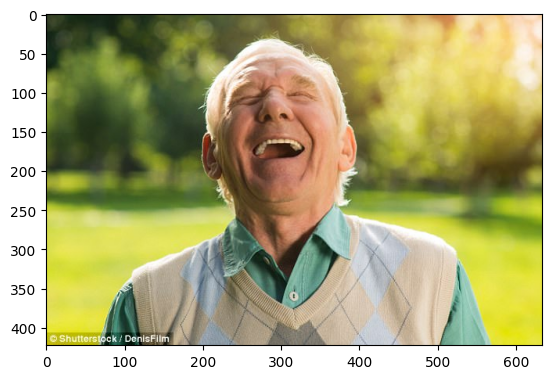

In [56]:
import cv2
img=cv2.imread("happy_people.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

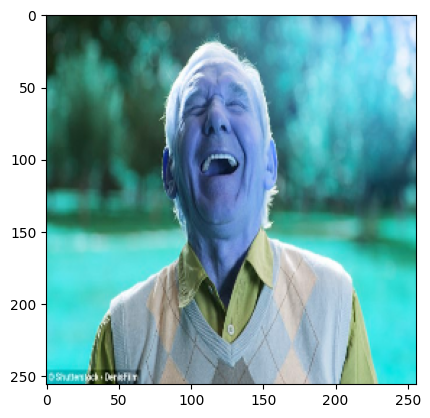

In [57]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
resize.shape

TensorShape([256, 256, 3])

In [59]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [60]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 131ms/step


In [61]:
yhat

array([[0.22935005]], dtype=float32)

In [62]:
if yhat>0.5:
    print(f"Predicted class is sad")
    
else:
    print(f"predicted class is Happy")

predicted class is Happy


Save the Model 

In [64]:
from tensorflow.keras.models import load_model

In [65]:
model.save(os.path.join('models','happy_sad_model.h5'))